In [1]:
using Plots

In [2]:
using WebIO


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-17662553110268784456\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-18222715903679368384\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-17662553110268784456\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [3]:
import Random

### funkcja generująca środowisko z pakietami żywnościowymi

In [4]:
function environment(n,m)
    Environment = zeros(Int64, n, m)
    for i in 2:3:n
        Environment[i,:] = ones(Int64, 1, m)
    end
    return Environment
end

environment (generic function with 1 method)

In [5]:
environment(20,20)

20×20 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1 

### funkcja determinująca przeżycie gołębia w trakcie ucieczki od jastrzębia (50% prawdopodobieństwa)

In [6]:
function golab_jastrzab(n_gol)
    if rand(0:1) == 0
        n_gol = n_gol - 1
    end
    return n_gol
end

golab_jastrzab (generic function with 1 method)

### funkcja determinująca stan populacji po wylosowaniu miejsc przy pakietach żywnościowych

In [7]:
#G-3
#J-8
function potyczki(n,m,macierz, g, ja)
    for i in 2:3:n, j in 1:m    
        suma = macierz[i-1,j] + macierz[i+1,j]
        if suma == 11
            g = golab_jastrzab(g)
            ja = ja + 1
        elseif suma == 6
            g = g
        elseif suma == 16 
            ja = ja - 2
        elseif suma == 3
            g += 2
        elseif suma == 8
            j += 2
        end 
    return g,ja
    end
end

potyczki (generic function with 1 method)

In [8]:
A = [3 3 8 8; 1 1 1 1; 3 3 3 8;
3 8 8 8; 1 1 1 1; 3 8 3 8]


6×4 Array{Int64,2}:
 3  3  8  8
 1  1  1  1
 3  3  3  8
 3  8  8  8
 1  1  1  1
 3  8  3  8

In [9]:
potyczki(6,4,A,8,8)


(8, 8)

In [10]:
B = [8 8 8 8 3;
1 1 1 1 1;
3 3 0 8 3;
3 3 3 8 8;
1 1 1 1 1;
8 8 0 3 3
]
#g = 10
#j = 11

6×5 Array{Int64,2}:
 8  8  8  8  3
 1  1  1  1  1
 3  3  0  8  3
 3  3  3  8  8
 1  1  1  1  1
 8  8  0  3  3

In [11]:
potyczki(6,4,B,9,10)

(9, 11)

### funkcja generująca rozstawienie ptaków w środowisku

In [12]:
function golabki(macierz, ngol)
    if ngol != 0  
        for i in 1:1:ngol
            z = findall(x -> x ==0, macierz)
            macierz[rand(z)] = 3
        end
    end
end
function jastrzabki(macierz, njas)
    if njas != 0
        for i in 1:1:njas
            z = findall(x -> x ==0, macierz)
            macierz[rand(z)] = 8
        end
    end
end

jastrzabki (generic function with 1 method)

In [13]:
mac = environment(21,21)
golabki(mac, 100)
jastrzabki(mac, 100)

In [14]:
test = environment(6,6)
golabki(test, 14)
jastrzabki(test, 10)
test

6×6 Array{Int64,2}:
 3  8  3  3  8  3
 1  1  1  1  1  1
 3  3  3  3  3  8
 8  3  8  8  3  8
 1  1  1  1  1  1
 8  8  3  3  3  8

In [15]:
mac

21×21 Array{Int64,2}:
 0  8  8  8  8  3  0  3  8  0  3  0  3  3  0  0  0  3  0  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 8  8  8  8  8  8  3  3  8  0  8  8  0  3  8  0  8  8  8  0  0
 8  3  8  0  3  8  8  0  8  0  8  8  8  8  3  3  8  3  3  0  0
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 8  8  3  3  0  3  8  3  0  8  8  8  3  3  8  3  3  8  3  8  3
 0  3  3  8  3  0  0  0  0  3  3  3  8  8  0  8  0  3  8  3  3
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 8  8  8  3  0  0  3  0  8  3  3  3  8  8  3  3  8  0  8  8  0
 3  3  8  3  8  8  3  3  3  8  0  0  0  3  3  8  0  3  8  0  8
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 8  0  0  8  8  8  0  0  8  8  0  3  8  0  0  0  8  0  3  3  3
 3  3  8  0  8  3  0  3  8  3  8  3  3  8  3  3  3  3  3  8  3
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 3  3  3  0  3  3  0  0  3  3  8  0  3  8  0  3  8  0  3  3  8
 0  0  0  0  0  3  0  0  0  8  0 

In [16]:
potyczki(21,21,mac,100,100)

(100, 100)

In [17]:
mac = environment(18,18)
golabki(mac, 70)
jastrzabki(mac, 90)

In [18]:
mac

18×18 Array{Int64,2}:
 8  0  3  8  3  3  3  8  3  3  8  0  3  8  0  8  8  3
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 3  3  0  8  3  8  8  0  3  0  8  8  0  0  8  8  8  8
 3  8  0  8  8  8  0  3  8  0  3  0  8  8  3  3  0  8
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 8  8  3  8  8  0  8  3  8  3  8  3  8  0  8  3  8  3
 8  3  3  8  3  8  8  8  3  0  8  8  3  8  0  0  8  0
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  8  3  3  3  3  8  3  3  8  3  8  8  0  8  8  3  3
 8  0  0  8  8  0  3  8  8  0  3  8  3  0  8  0  3  8
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 3  8  8  8  0  8  0  8  8  0  8  8  3  8  0  3  8  3
 8  8  8  8  0  8  0  8  3  0  3  3  3  3  3  0  0  8
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 8  0  8  8  3  0  0  3  0  3  3  3  3  0  8  8  3  3
 0  0  8  3  0  0  0  0  0  8  8  3  3  8  3  0  0  3
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
 0  3  8  0  8  3  0  8  0  0  0  3  8  3  8  3  3  8

In [19]:
potyczki(18,18,mac,70,90)

(69, 91)

### funkcja sprawdzająca nadmiar populacji i ilość ptaków wysłaną na wygnanie/ fight club

funkcja/wątek do rozwinięcia

In [20]:
function check(n,m,ng, nja)
    if ng + nja > 2*n*m/3
        env_ng = Int64(round(ng/(ng+nja) * 2*n*m/3))
        env_ja = Int64(round(nja/(ng+nja) * 2*n*m/3))
        fight_g = ng - env_ng
        fight_ja = nja - env_ja
        ng = env_ng
        nja = env_ja
        return ng, nja, fight_g, fight_ja
    else
        fight_g = 0
        fight_ja = 0
        return ng, nja, fight_g, fight_ja
    end
end


check (generic function with 1 method)

In [21]:
check(9,9, 35,30)


(29, 25, 6, 5)

In [22]:
print(check(9,9,50,60))


(25, 29, 25, 31)

In [23]:
function fight_club(n_gol, n_jas)
    if (n_gol+n_jas)%2 == 0
        n = Int64((n_gol + n_jas)/2)
        M = zeros(Int64, 2, n)
        if n_gol != 0
            golabki(M,n_gol)
        end
        if n_jas!=0
            jastrzabki(M,n_jas)
        end
    else
        n = Int64((n_gol + n_jas + 1)/2) 
        M = zeros(Int64, 2, n)
        if n_gol != 0
            golabki(M,n_gol)
        end
        if n_jas!=0
            jastrzabki(M,n_jas)
        end
    end
    return M
end
        

fight_club (generic function with 1 method)

In [24]:
fight_club(3,3)

2×3 Array{Int64,2}:
 8  3  3
 3  8  8

In [25]:

function fight(macierz, n_gol, n_jas)
    for i in 1:size(macierz)[2]
        suma = macierz[1,i] + macierz[2,i]
        if suma == 6
            n_gol -= 1
        elseif suma == 16
            n_jas -= 1
        elseif suma == 11
            if rand(0:1) == 0
                n_gol -= 1
            else
                n_jas -= 1
            end
        end
    end
    return n_gol, n_jas
end

fight (generic function with 1 method)

In [26]:
fight(fight_club(3,3), 3, 3)

(1, 2)

### Generowanie środowiska z mniejszą ilością pakietów (na wypadek przykładowej suszy/ pożaru)


In [27]:
function environment_food_amount(size1 = 21, size2 = 21, amount = 100)
#ilość wieszy musi być podzielna przez 3
    if size1 % 3 != 0
        throw(DomainError(size, "incorrect size"))
    end
    Environment = zeros(Int64, size1, size2)
    A = zeros(Int64, 1, size2*(fld(size1-2,3)+1))
    A[1,1:amount] = ones(Int64, 1, amount)
    A = Random.shuffle(A)
    k = 1
    for i in 2:3:size1
        Environment[i,:] = A[1, k:(k+size1-1)]
        k += size1
    end
    return Environment
end

environment_food_amount (generic function with 4 methods)

In [28]:
function action(n, m, n_gol, n_jas, p, A, index = 1)
    
    if p == 0
        return A
    end
    
    srod = environment(n,m) ##mamy pakiety
    
    a = check(n, m, n_gol, n_jas) #sprawdzamy czy nie ma za dużo ptaszków, zwraca jako (gol_safe, jas_safe, gol_fight, jas_fight)
    n_gol = a[1]
    n_jas = a[2]

    golabki(srod, n_gol)
    jastrzabki(srod, n_jas)  ##mamy srodowisko z ptaszkami
    
    result = potyczki(n,m,srod, n_gol, n_jas) ##mamy stan populacji po potyczkach
    n_gol = result[1] ##liczba gołębi
    n_jas = result[2]
    
    ##w miedzyczasie fight club :
    
    
    b = fight(fight_club(a[3],a[4]), a[3], a[4]) #populacja po fight clubie - (gol, jas)
    
    n_gol += b[1] ##ostateczna ilosc golebi - ta bezpieczna + fight club
    n_jas += b[2] ## -||- jastrzebi
    gol_fight = b[1] ##ilość ptakow po fightcie, może się przyda c:
    jas_fight = b[2]
    
    A[index, 1] = n_gol
    A[index, 2] = n_jas
    index += 1
    #println(n_gol,",", n_jas,",", gol_fight, ",",jas_fight)
    
    action(n, m, n_gol, n_jas, p-1, A, index) #i lecimy rekurencją
end

action (generic function with 2 methods)

In [29]:
A = action(9,9,30,30, 100, zeros(Int64, 100, 2))

100×2 Array{Int64,2}:
 28  29
 26  30
 25  31
 24  32
 23  32
 22  33
 21  34
 20  35
 20  33
 20  31
 19  32
 19  32
 18  33
  ⋮  
 20  25
 19  26
 19  26
 19  27
 19  28
 19  26
 19  26
 21  26
 21  27
 20  28
 20  26
 20  24

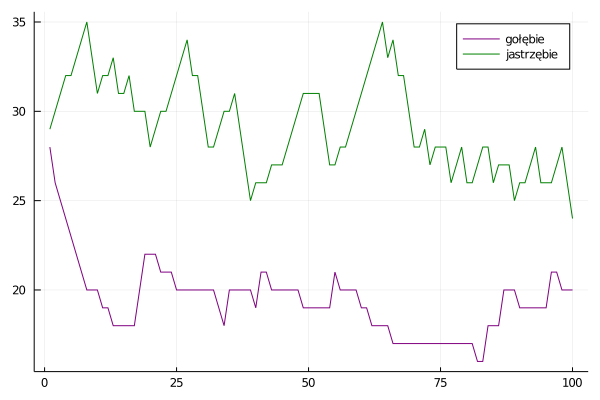

In [30]:
plot(1:size(A)[1], A[:, 1], label="gołębie", color= :purple)
plot!(1:size(A)[1], A[:, 2], label="jastrzębie", color= :green)

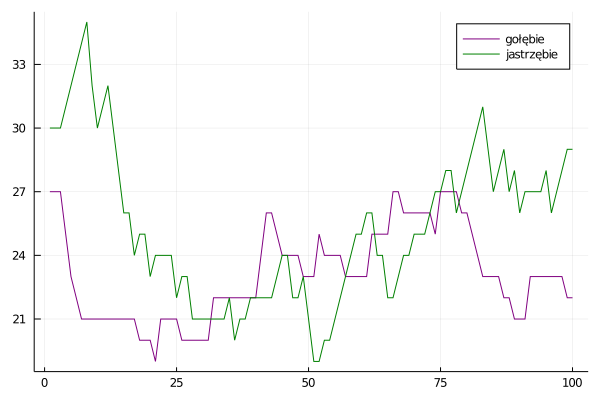

In [31]:
A = action(9,9,30,30, 100, zeros(Int64, 100, 2))
plot(1:size(A)[1], A[:, 1], label="gołębie", color= :purple)
plot!(1:size(A)[1], A[:, 2], label="jastrzębie", color= :green)

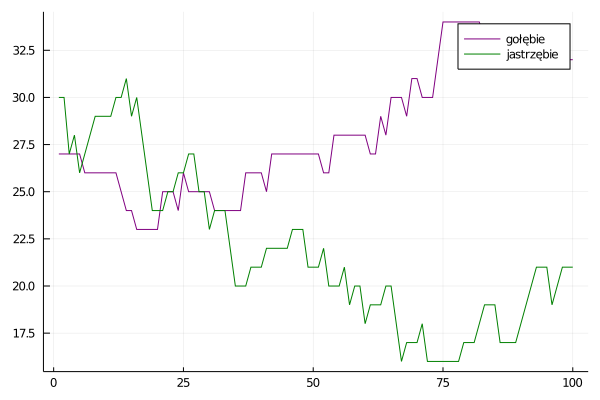

In [32]:
A = action(9,9,30,30, 100, zeros(Int64, 100, 2))
plot(1:size(A)[1], A[:, 1], label="gołębie", color= :purple)
plot!(1:size(A)[1], A[:, 2], label="jastrzębie", color= :green)

In [33]:
@manipulate for time = 2:1:100
    plot(1:time, A[1:time, 1], label="gołębie", color= :purple)
    plot!(1:time, A[1:time, 2], label="jastrzębie", color= :green)
end

LoadError: LoadError: [91mUndefVarError: @manipulate not defined[39m
in expression starting at In[33]:1

# ---------------------------------------------sekcja 2-----------------------------------------------------

## funkcje generujące środowisko

In [86]:
function environment2(n,m) ###generuje środowisko z pakietami
    if n % 3 != 0
        throw(DomainError(size, "incorrect size"))
    end
    
    Environment = zeros(Int64, n, m)
    
    for i in 2:3:n
        Environment[i,:] = ones(Int64, 1, m)
    end
    return Environment
end

function environment_poison(Environment) ###zatruwa środowisko - wprowadza zatrute oraz puste pakiety
    
    n = size(Environment)[1]
    m = size(Environment)[2]
    
    liczba = floor((n/3*m) * 0.04)  #szacowanie około 8? % wszystkich możliwych pakietów
    ilosc_pakietow = rand(1:liczba) #+ 5  #randomowe przypisanie konkretnej ilości danego rodzaju pakietów w danym wywołaniu
    
    for i in 1:1:ilosc_pakietow
        z = findall(x -> x == 1, Environment)
        Environment[rand(z)] = -1
    end
    
    for i in 1:1:ilosc_pakietow
        z = findall(x -> x == 1, Environment)
        Environment[rand(z)] = 0
    end
    
    return Environment
end

environment_poison (generic function with 1 method)

In [35]:
a = environment2(9,9)

9×9 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0

In [36]:
b = environment_poison(a)

9×9 Array{Int64,2}:
  0   0  0   0  0  0  0   0  0
 -1   0  1   1  0  0  1  -1  1
  0   0  0   0  0  0  0   0  0
  0   0  0   0  0  0  0   0  0
  1  -1  1  -1  0  1  1  -1  0
  0   0  0   0  0  0  0   0  0
  0   0  0   0  0  0  0   0  0
 -1   1  1   1  1  0  1   1  1
  0   0  0   0  0  0  0   0  0

## funkcja usuwająca konkretną rzecz z macierzy

In [37]:
function remove!(a, item)
    deleteat!(a, findall(x->x==item, a))
    return a
end

remove! (generic function with 1 method)

## Funkcja generująca rozstawienie ptaków w środowisku

In [38]:
function find_place(macierz, g, ja, ch_g, ch_j)
    n = size(macierz)[1]
    m = size(macierz)[2]
    slots = 2*n*m/3
    amount_of_birds = g + ja + ch_g + ch_j
    birds = [7, 10, 70, 100] ##gołąb-7, jastrząb-10, chory gołąb -10, chory jastrząb - 100
    any_bird = [g, ja, ch_g, ch_j] ###ilość każdego z ptaków
    
    if amount_of_birds > slots ###jeśli ptaków jest więcej niż miejsc - iteracja po miejscach
        for i in 1:slots
            pustka = findall(x -> x == 0, any_bird) ## jeśli każdy ptaszek z danego gatunku już jest przydzielony to go usuwamy
            pustka = reverse(pustka)
            if length(pustka) != 0
                for k in pustka
                    n = birds[k]
                    birds = remove!(birds, n)
                end
                any_bird = remove!(any_bird, 0)
            end
            number = rand(1:length(birds))
            current_bird = birds[number]
            z = findall(x -> x == 0, macierz)
            macierz[rand(z)] = current_bird ##przydzielamy ptaszka randomowo
            any_bird[number] -= 1
        end
        
    elseif slots > amount_of_birds ###jeśli miejsc jest więcej niż ptaków - iteracja po ptakach
        for i in 1:amount_of_birds
            pustka = findall(x -> x == 0, any_bird)
            pustka = reverse(pustka)
            if length(pustka) != 0
                for k in pustka
                    n = birds[k]
                    birds = remove!(birds, n)
                end
                any_bird = remove!(any_bird, 0)
            end
            number = rand(1:length(birds))
            current_bird = birds[number]
            z = findall(x -> x == 0, macierz)
            macierz[rand(z)] = current_bird
            any_bird[number] -= 1
        end
    end
    macierz = environment_poison(macierz) ##zatruwamy środowisko
    
    ###sprawdzenie nadpopulacji
    
    f_gol = 0
    f_jas = 0
    f_chg =0 
    f_chj = 0
    
    for i in 1:length(birds)
        if birds[i] == 7
            f_gol += any_bird[i]
        elseif birds[i] == 10
            f_jas += any_bird[i]
        elseif birds[i] == 70
            f_chg += any_bird[i]
        elseif birds[i] == 100
            f_chj += any_bird[i]
        end
    end
    
    return macierz, f_gol, f_jas, f_chg, f_chj ###zwraca macierz środowiska, ilość ptaków w nim oraz tych do fight clubu
end

find_place (generic function with 1 method)

In [39]:
a = environment2(9, 9)
find_place(a, 14, 14, 14, 14)

([7 10 … 100 70; 0 0 … -1 -1; … ; 0 1 … 1 1; 10 7 … 10 70], 0, 2, 0, 0)

In [40]:
function ptaszki(macierz, n, k)
    if n != 0  
        for i in 1:1:n
            z = findall(x -> x ==0, macierz)
            macierz[rand(z)] = k
        end
    end
end

ptaszki (generic function with 1 method)

In [41]:
function fight_club2(g,j, ch_g,ch_j)
    lista_ptakow = [7, 10,70,100]
    suma_ptakow = [g,j,ch_g,ch_j]
    if (g+j+ch_g+ch_j)%2 == 0
        n = Int64((g+j+ch_g+ch_j)/2)
        M = zeros(Int64, 2, n)
        for i in 1:length(lista_ptakow)
            ptaszki(M,suma_ptakow[i],lista_ptakow[i])
        end
    else
        n = Int64((g + j + ch_g + ch_j + 1)/2) 
        M = zeros(Int64, 2, n)
        for i in 1:length(lista_ptakow)
            ptaszki(M,suma_ptakow[i],lista_ptakow[i])
        end
    end
    return M
end

fight_club2 (generic function with 1 method)

In [42]:

function fight2(macierz, g,j,ch_g,ch_j)
    for i in 1:size(macierz)[2]
        suma = macierz[1,i] + macierz[2,i]
        if suma == 14 || suma == 7 || suma == 77 ##gołąb / 2gołebie/ gołąb + chory gołąb
            g -= 1
        elseif suma == 20 || suma == 10 || suma == 110 ###jastrząb / 2jastrzębie / jastrząb + chory jastrząb
            j -= 1
        elseif suma == 70 || suma == 140 ## chore gołebie
            ch_g -= 1
        elseif suma == 100 || suma == 200 ## chore jastrzebie
            ch_j -= 1
            
        elseif suma == 17 ##gołąb vs jastrząb
            if roll_for_pakiet(66) == true
                g-=1
            else
                j-=1
            end
        
        elseif suma == 107 ##chory jastrząb + gołąb
            g-=1
            if roll_for_pakiet(66) == false
                ch_g+=1
                ch_j-=1
            end
        elseif suma == 80 ##chory gołąb + jastrząb
            j-=1
            if roll_for_pakiet(66) == true
                ch_j+=1
                ch_g-=1    
            end
            
        elseif suma == 170 ##chory jastrząb + chory gołąb
            if roll_for_pakiet(66) == true
                ch_g-=1
            else
                ch_j-=1
            end

        end
    end
    return g, j, ch_g, ch_j
end

fight2 (generic function with 1 method)

In [64]:
fight2(fight_club2(5,5,5,6), 5,5,5,6)

(1, 1, 2, 6)

In [44]:
fight_club2(5,5,5,6)

2×11 Array{Int64,2}:
 100   7   7  100  10  70  100  100   70  100   0
  10  70  10    7   7   7   10   10  100   70  70

## funkcja decydująca o dalszym losie ptaszków

In [45]:
function roll_for_pakiet(some_fate)
    fate = rand(1:101)
    if fate <= some_fate
        return true
    end
end

roll_for_pakiet (generic function with 1 method)

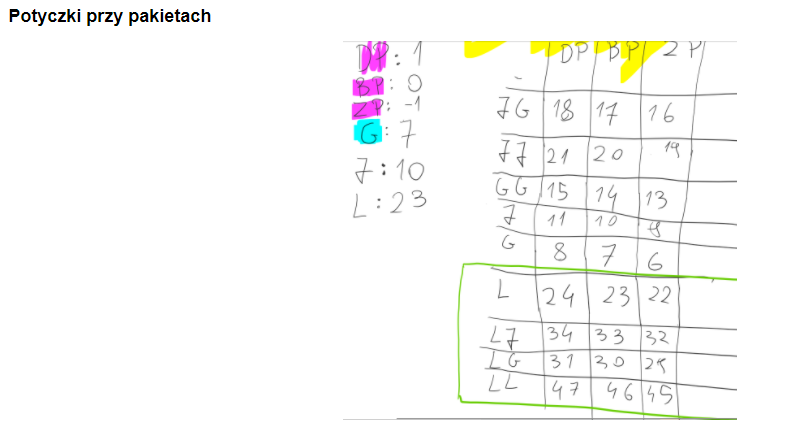

In [46]:
function death(bird, deadliness)
    for i in 1:bird
        if roll_for_pakiet(deadliness)==true
            bird -= 1
        end
    end
    return bird
end

death (generic function with 1 method)

In [47]:
function sickness(ch_g, ch_j, deadliness)
    ch_g = death(ch_g, deadliness)
    
    ch_j = death(ch_j, deadliness)
    return ch_g, ch_j
end

sickness (generic function with 1 method)

### funkcja potyczek

In [48]:
function potyczki2(n, m, macierz, g, ja, ch_g = 0, ch_j = 0)
    for i in 2:3:n, j in 1:m    
        suma = macierz[i - 1, j] + macierz[i, j] + macierz[i + 1, j]
        if suma == 18
            #Jastrząb i Gołąb dobry pakiet
            ja += 1
            if roll_for_pakiet(50) == true
                g -= 1
            end
        elseif suma == 15
            continue
            #Gołąb i Gołąb dobry pakiet
           # g = g
        elseif suma == 21
            #Jastrząb i Jastrząb dobry pakiet
            ja -= 2
        elseif suma == 8
            #Gołąb dobry pakiet
            g += 1
        elseif suma == 11
            #Jastrząb dobry pakiet
            ja += 1
        elseif suma == 81
            #Jastrząb i Ch_Gołąb dobry pakiet
            if roll_for_pakiet(10) == true
                ja -= 1
                ch_j += 1
            end    
            if roll_for_pakiet(50) == true
                    ch_g -= 1
            end
                
        elseif suma == 108
            #Ch_Jastrząb i Gołąb dobry pakiet
            if roll_for_pakiet(10) == true
                g -= 1
                ch_g += 1
            end
            if roll_for_pakiet(50) == true
                ch_j -= 1
                ja += 1
            else
                ch_j += 1
            end
            
            
        elseif suma == 201
            #Ch_Jastrząb i Ch_Jastrząb dobry pakiet
            ch_j -= 2
        elseif suma == 141
            continue
            #Ch_Gołąb i Ch_Gołąb dobry pakiet
            #ch_g = ch_g
        elseif suma == 71
            #Ch_Gołąb dobry pakiet
            if roll_for_pakiet(50) == true
                ch_g -= 1
                g += 1
            else
                ch_g += 1
            end
            
        elseif suma == 101
            #Ch_Jastrząb dobry pakiet
            if roll_for_pakiet(50) == true
                ch_j -= 1
                ja += 1
            else
                ch_j += 2
            end
        elseif suma == 111
            #Ch_Jastrząb i Jastrząb dobry pakiet
            ch_j -= 1
            if roll_for_pakiet(50) == true
                ja += 1
            else
                ch_j += 1
            end
        elseif suma == 78
            #Ch_Gołąb i Gołąb dobry pakiet
            if roll_for_pakiet(60) == true
                ch_g += 1
            end
            
        elseif suma == 17
            #Jastrząb i Gołąb pusty pakiet
            g = g-1
        elseif suma == 20
            #Jastrząb i Jastrząb pusty pakiet
            ja = ja-1
        elseif suma == 14
            #Gołąb i Gołąb pusty pakiet
            g = g-2
        elseif suma == 10
            #Jastrząb pusty pakiet
            ja = ja-1
        elseif suma == 7
            #Gołąb pusty pakiet
            g = g-1
                
         elseif suma == 80
            #Jastrząb i Ch_Gołąb pusty pakiet
            g -= 1
            ja -= 1
            ch_j += 1
        elseif suma == 107
            #Ch_Jastrząb i Gołąb pusty pakiet
            g -= 1
            if roll_for_pakiet(30) == true
                ch_j -= 1
                ja += 1
            end
        elseif suma == 200
            #Ch_Jastrząb i Ch_Jastrząb pusty pakiet
            ch_j -= 2
        elseif suma == 140
            #Ch_Gołąb i Ch_Gołąb pusty pakiet
            ch_g -= 2
            
        elseif suma == 70
            #Ch_Gołąb pusty pakiet
            ch_g -= 1
            
        elseif suma == 100
            #Ch_Jastrząb pusty pakiet
            ch_j -= 1
            
        elseif suma == 110
            #Ch_Jastrząb i Jastrząb pusty pakiet
            ja -= 1
            
        elseif suma == 77
            #Ch_Gołąb i Gołąb pusty pakiet
            ch_g -= 1
            g -= 1
            
            
            
        elseif suma == 16
            #Jastrząb i Gołąb zatruty pakiet
            g -= 1
            ja -= 1
            if roll_for_pakiet(20) == true
                ch_j += 1
            end    
        elseif suma == 19
            #Jastrząb i Jastrząb zatruty pakiet
            ja -= 1
        elseif suma == 13
            #Gołąb i Gołąb zatruty pakiet
            g -= 2
            if roll_for_pakiet(6) == true
                ch_g += 2
            end
        elseif suma == 9
            #Jastrząb  zatruty pakiet
            ja = ja-1
        elseif suma == 6
            #Gołąb zatruty pakiet
            g = g-1 
            if roll_for_pakiet(20) == true
                ch_g += 1
            end        
         elseif suma == 79
            #Jastrząb i Ch_Gołąb zatruty pakiet
            ch_g -= 1 
            ja -= 1
            if roll_for_pakiet(70) == true
                ch_j += 1
            end
            
        elseif suma == 106
            #Ch_Jastrząb i Gołąb zatruty pakiet
            g -= 1
            if roll_for_pakiet(40) == true
                ch_j -= 1
            end
                
        elseif suma == 199
            #Ch_Jastrząb i Ch_Jastrząb zatruty pakiet
            ch_j -= 2
        elseif suma == 139
            #Ch_Gołąb i Ch_Gołąb zatruty pakiet
            ch_g -= 2
            if roll_for_pakiet(1) == true
                ch_g += 2
            end
            
        elseif suma == 69
            #Ch_Gołąb zatruty pakiet
            ch_g -= 1
        elseif suma == 99
            #Ch_Jastrząb zatruty pakiet
            ch_j -= 1
        elseif suma == 109
            #Ch_Jastrząb i Jastrząb zatruty pakiet
            ja -= 1
        elseif suma == 76
            #Ch_Gołąb i Gołąb zatruty pakiet
            g -= 1
            if roll_for_pakiet(2) == true
                ch_g += 1
            end
        end 
    end
    sick_birds = sickness(ch_g, ch_j, 80)
    ch_g = sick_birds[1]
    ch_j = sick_birds[2]

    return g, ja, ch_g, ch_j
end

potyczki2 (generic function with 3 methods)

# próba optymalizacji nr 1 - rozbicie funkcji na 3 części w zależności od pakietu

In [116]:
function potyczki3(n, m, macierz, g, ja, ch_g = 0, ch_j = 0)
    for i in 2:3:n, j in 1:m    
        suma = macierz[i - 1, j] + macierz[i + 1, j]
        if macierz[i, j] == 1
            result = pot_norm(suma, g, ja, ch_g, ch_j)
            g = result[1]
            ja= result[2]
            ch_g = result[3]
            ch_j = result[4]
        elseif macierz[i,j] == 0
            result = pot_pust(suma, g, ja, ch_g , ch_j )
            g = result[1]
            ja= result[2]
            ch_g = result[3]
            ch_j = result[4]
        elseif macierz[i, j] == -1
            result = pot_zatr(suma, g, ja, ch_g, ch_j)
            g = result[1]
            ja= result[2]
            ch_g = result[3]
            ch_j = result[4]
        end
    end
    sick_birds = sickness(ch_g, ch_j, 5)
    ch_g = sick_birds[1]
    ch_j = sick_birds[2]

    return g, ja, ch_g, ch_j
end 

potyczki3 (generic function with 3 methods)

In [164]:
function pot_norm(suma, g, ja, ch_g = 0, ch_j = 0) ##funkcja do zwykłych pakietów
    if suma == 7 ##sam gołąb
        g += 1
    elseif suma == 10 ###jastrząb
        ja += 1
    elseif suma == 70 ##chory goł
        if roll_for_pakiet(25) == true #szansa na wyzdrowienie
            ch_g -= 1
            g += 1
        else ##zrodzenie chorego gołąbka
            ch_g += 1
        end
    elseif suma == 100 ##chory jastrz
        if roll_for_pakiet(25) == true #szansa na wyzdrowienie
            ch_j -= 1
            ja += 1
        else
            ch_j += 1 #zrodzenie jastrzebia 
        end
    elseif suma == 20 #dwa jastr - biją się
        ja -= 2
    elseif suma == 200 #dwa chore jastr- bitka
        ch_j -= 2
    elseif suma == 17 
        ja += 1 #jastrz się rozmnaża
        if roll_for_pakiet(50) == true ##gołąb ma 50%szans na ucieczke
            g -= 1
        end
    elseif suma == 170 #chory gołąb + ch jastrz
        ja += 1 #jastrz zdrowieje, chory gołąb ginie
        ch_j -=1
        ch_g -=1
    elseif suma == 77 ##chory g + zdrowy g
        if roll_for_pakiet(80) == true
            ch_g += 1
        end
    elseif suma == 80 #jastrzab + chg
        ch_g -= 1 ##chory gołąb ginie
        if roll_for_pakiet(60) == true ##60% szans na zachorowanie jastrzebia
            ja -= 1
            ch_j += 1
        end    
        
    elseif suma == 107 ###chory jastrz + zdrowy goł
        if roll_for_pakiet(60) == true # 60% szans na zachorowanie gołębia
            g -= 1
            ch_g += 1
        end
        if roll_for_pakiet(25) == true ##25% szans na wyzdrowienie jastrz
            ch_j -= 1
            ja += 1
        else
            ch_j += 1 # ewentualnie zrodzenie ch jastrząbka
        end
    elseif suma == 110 #chory jastrz + zdrowy jastrz
        ch_j -= 1 ##zdrowy zabija chorego
        if roll_for_pakiet(20) == true ##20% szansy na unikniecie choroby i zrodzenie jastrząbka
            ja += 1
        else
            ja -= 1
            ch_j += 1 ##80% szansy na zachorowanie
        end
    end
    return g, ja, ch_g, ch_j
end
        
        
    

pot_norm (generic function with 3 methods)

In [177]:
function pot_zatr(suma, g, ja, ch_g = 0, ch_j = 0) ###funkcja do zatrutych pakietów
    if suma == 7 #gołab
        g = g - 1 
        if roll_for_pakiet(70) == true #szansa na zachorowanie, 30% na śmierć
            ch_g += 1
        end        
    elseif suma == 10 #jastrzab umiera
        ja = ja-1
        if roll_for_pakiet(10) == true #szansa na zachorowanie, 90% na śmierć
            ch_j += 1
        end        
    elseif suma == 70 ##chory gołab umiera
        ch_g -= 1
    elseif suma == 100 #chory jastrzab umiera
        ch_j -= 1
    elseif suma == 14 ##dwa gołebie
        g -= 2
        if roll_for_pakiet(60) == true ##60% szansy na zachorowanie, 40 - śmierć
            ch_g += 2
        end
    elseif suma == 140 #dwa chore gołębie
        ch_g -= 2
        if roll_for_pakiet(10) == true ##10%szans na przeżycie
            ch_g += 2
        end
    elseif suma == 20 #dwa jastrzebie - biją się, ale jeden przeżywa
        ja -= 1
    elseif suma == 200 #dwa chore jastrz - bitka
        ch_j -= 2
    elseif suma == 17 ## jastrz + gołąb
        g -= 1 #gołab umiera
        ja -= 1
        if roll_for_pakiet(40) == true ## szansa na zachorowanie, w innym wypadku śmierć
            ch_j += 1
        end 
    elseif suma == 170 ##chj + chg
        ch_g -= 1 #chory gołab umiera
        if roll_for_pakiet(70) == true #chory jastrzab umiera (70%)
            ch_j -=1
        end
    elseif suma == 77 ##chory gołab + zdrowy gołąb
        g -= 1
        if roll_for_pakiet(20) == true ##zdrowy choruje, chory ma 20% na przeżycie
            ch_g += 1
        end
    elseif suma == 80 ##chory g + jastrz
        ch_g -= 1 #chg umiera
        ja -= 1
        if roll_for_pakiet(70) == true #jastrzab ma 70% na chorobe, 30 na śmierć
            ch_j += 1
        end
    elseif suma == 107 #chory jastrzab, gołąb
        g -= 1
        if roll_for_pakiet(60) == true #gołąb ma większą szansę na ucieczke, ale choruje
            ch_g += 1
        end
        if roll_for_pakiet(80) == true #jastrzab umiera po zjedzeniu zatr.p
            ch_j -= 1
        end
    elseif suma == 110 #jastrz + chj
        ja -= 1 ##chj umiera, ten zdrowy choruje
    end
    return g, ja, ch_g, ch_j
end
        

pot_zatr (generic function with 3 methods)

In [198]:
function pot_pust(suma, g, ja, ch_g = 0, ch_j = 0) ##funkcja do pustych pakietów
    if suma == 7 ## gołąb
        g = g - 1 #gołąb umiera      
    elseif suma == 10 #jastrz
        ja = ja-1 #jstr umiera
    elseif suma == 70 #chg
        ch_g -= 1
    elseif suma == 100 #chj
        ch_j -= 1
    elseif suma == 14 #2 g
        g = g-2
    elseif suma == 140 # 2chg
        ch_g -= 2
    elseif suma == 20 #2j
        ja = ja-1
    elseif suma == 200 #2 chj
        ch_j -= 2
    elseif suma == 17 #gołąb + jastrząb
        g = g-1
    elseif suma == 170 #chory jastr + ch gołąb
        ch_g -= 1
        ch_j -=1
    elseif suma == 77 #chg + g
        ch_g -= 1
        g -= 1
    elseif suma == 80 #chg + jastrz
        g -= 1
        ja -= 1
        ch_j += 1
    elseif suma == 107 #chj + g
        g -= 1
        ch_j -= 1
    elseif suma == 110 #chj + j
        ja -= 1
    end
    return g, ja, ch_g, ch_j
end
        

pot_pust (generic function with 3 methods)

### funkcja właściwa

In [105]:
function action2(n, m, g, j, ch_g, ch_j, p, A = [], index = 1)
    #n,m - wielkość środowiska
    #g,j,ch_g,ch_j -liczba ptaków danego gatunku
    #p - parametr czasowy
    
    if p == 0
        println("o kurczaki chyba działa")
        return A
    end
    
    max_amount = 2/3*m*n
    amount_of_birds = g+j+ch_g+ch_j
    srodowisko = environment2(n, m)
    first_try = find_place(srodowisko, g, j, ch_g, ch_j) 
    macierz = first_try[1]
    f_gol = first_try[2] 
    f_jas = first_try[3]
    f_chg =  first_try[4] 
    f_chja = first_try[5] 
    fight = fight_club2(f_gol, f_jas, f_chg, f_chja)
    g_p = length(findall(x -> x == 7, macierz))
    j_p = length(findall(x -> x == 10, macierz))
    chg_p = length(findall(x -> x == 70, macierz))
    chj_p = length(findall(x -> x ==100, macierz))
    
    potyczki_result = potyczki3(n, m, macierz, g_p, j_p, chg_p, chj_p)


    if amount_of_birds > max_amount
        fight = fight_club2(f_gol, f_jas, f_chg, f_chja)
        fight_result = fight2(fight, f_gol, f_jas, f_chg, f_chja)
        final_g = potyczki_result[1] + fight_result[1]
        final_j = potyczki_result[2] + fight_result[2]
        final_chg = potyczki_result[3] + fight_result[3]
        final_chj = potyczki_result[4] + fight_result[4]
    else
        final_g = potyczki_result[1] 
        final_j = potyczki_result[2] 
        final_chg = potyczki_result[3] 
        final_chj = potyczki_result[4] 
    end
    
    if final_g <0
        final_g =0
    elseif final_j<0
        final_j = 0
    elseif final_chg<0
        final_chg = 0
    elseif final_chj<0
        final_chj = 0
    end

    if index == 1
        A = [final_g final_j final_chg final_chj]
    else
        A = vcat(A,[final_g final_j final_chg final_chj])
    end
    
    #println(final_g,", ", final_j,", ", final_chg, ", ",final_chj)
    
    if final_g == 0 && final_j == 0 && final_chg == 0 && final_chj == 0
        println("they all died")
        return A
    end
    
    
    action2(n, m , final_g, final_j, final_chg,final_chj, p-1, A, index+1)
end

action2 (generic function with 3 methods)

In [214]:
dying = action2(9,9,15,10,100,135,50)

o kurczaki chyba działa


50×4 Array{Int64,2}:
  9  13  48  78
  7  10  20  47
  5   6   9  21
  8  10   4   7
  9  15   2   5
 11  24   2   5
 12  23   0   8
  9  20   2  11
  7  17   4   9
  5  20   6   5
  7  16   6   8
  8  10   7  11
 10  11   6  10
  ⋮          
  9  15   6   8
  6  16   7   9
  3  16   6   6
  3   7   9  10
  7  15   7   4
  8  17   2   2
 10  16   5   3
 17  20   3   5
 17  18   4   5
 13  18   4   8
 12  20   3   9
  8  24   3   5

In [215]:
using Plots

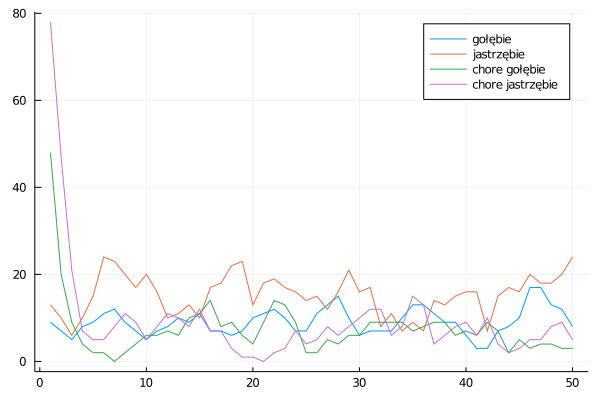

In [216]:
plot(1:size(dying)[1], dying[:,1], label="gołębie")
plot!(1:size(dying)[1], dying[:,2], label="jastrzębie")
plot!(1:size(dying)[1], dying[:,3], label="chore gołębie")
plot!(1:size(dying)[1], dying[:,4], label="chore jastrzębie")

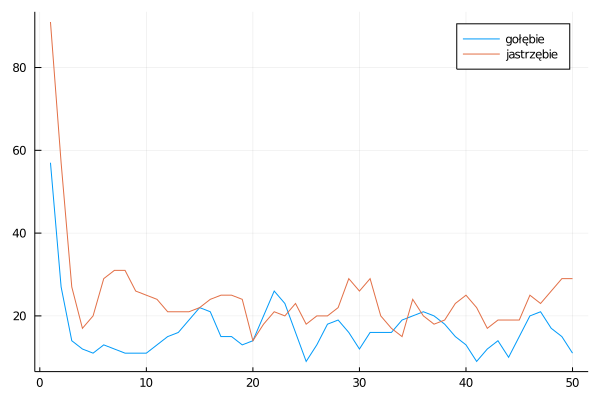

In [217]:
plot(1:size(dying)[1], dying[:,1].+dying[:,3], label="gołębie")
plot!(1:size(dying)[1], dying[:,2].+dying[:,4], label="jastrzębie")

## funkcja rysująca wykresy

In [150]:
function wykresy_all(n,m, g,j,ch_g,ch_j,p)
    result = action2(n,m, g,j,ch_g,ch_j,p)
    plot(1:size(result)[1], result[:,1], label="gołębie")
    plot!(1:size(result)[1], result[:,2], label="jastrzębie")
    plot!(1:size(result)[1], result[:,3], label="chore gołębie")
    plot!(1:size(result)[1], result[:,4], label="chore jastrzębie")
end

wykresy_all (generic function with 1 method)

In [151]:
function wykresy_two(n,m, g,j,ch_g,ch_j,p)
    result = action2(n,m, g,j,ch_g,ch_j,p)
    plot(1:size(result)[1], result[:,1], label="gołębie")
    plot!(1:size(result)[1], result[:,2], label="jastrzębie")
end

wykresy_two (generic function with 1 method)

o kurczaki chyba działa


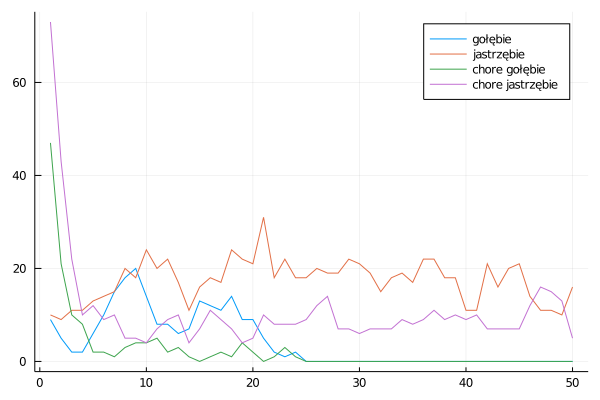

In [213]:
wykresy_all(9,9,15,10,100,135,50)

o kurczaki chyba działa


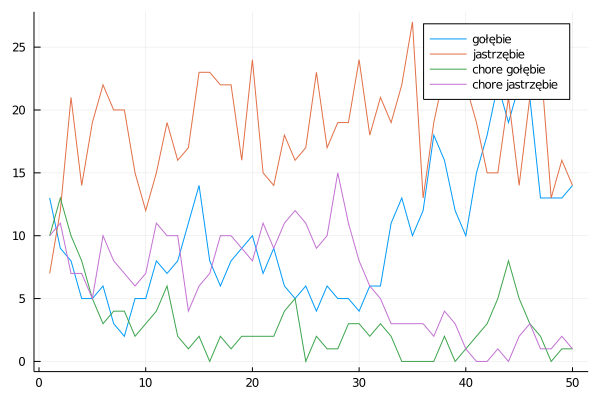

In [204]:
wykresy_all(9,9,10,10,10,10,50)

o kurczaki chyba działa


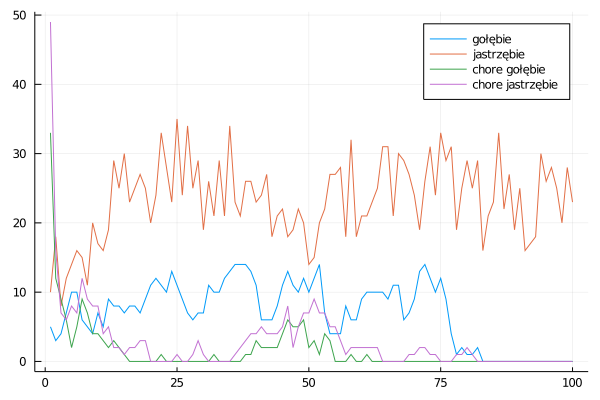

In [209]:
wykresy_all(9,9,10,10,70,70,100)

o kurczaki chyba działa


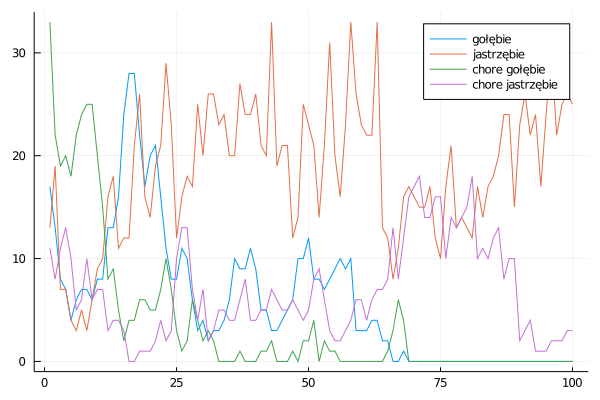

In [212]:
wykresy_all(9,9,40,20,40,20,100)

chyba jakoś działa, ale w sumie to ciężko powiedzieć